<a href="https://colab.research.google.com/github/blckpwdr50/datasciencecoursera/blob/master/TRAIN_HS_PD_Lab_13_%5BDaniel_Schaben%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 13: Training Neural Networks**
---


### **Description**
This lab focuses on continuing to build and train neural networks using the keras python library. This will cover key topics such as:
* Network structure
* Hidden layers
* Layer types
* Activation functions
* Training neural networks
* Different optimization algorithms

<br>

We will work with a famous wine dataset that rates the quality of red variants of the Portuguese "Vinho Verde" wine according to a variety of chemical properties (these are our features):
1. `fixed acidity`
2. `volatile acidity`
3. `citric acid`
4. `residual sugar`
5. `chlorides`
6. `free sulfur dioxide`
7. `total sulfur dioxide`
8. `density`
9. `pH`
10. `sulphates`
11. `alcohol`

**You will use deep learning for regression to predict this variable**:
12. `quality` (continuous score between 0 and 10)

<br>

### **Lab Structure**
* **Part 1**: [Comparing Linear Regression and Neural Networks](#p1)

* **Part 2**: [Model Architecture](#p2)

* **Part 3**: [Hyperparameter Tuning](#p3)

* **Part 4**: [[HOMEWORK] Neural Networks for Classification](#p4)



<br>

### **Goals**
By the end of this lab, you will:
* Learn how to use and tune both Stochastic Gradient Descent and Adam for training Neural Networks.
* Train and evaluate a Neural Network for both regression and classification.

<br>


### **Cheat Sheets**:
* [Deep Learning with keras](https://docs.google.com/document/d/1vc51G6X8ERimrVW6kuyIXNcumR-34-SNiUXA8IYK_1o/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**




In [ ]:
from keras.models import Sequential
from keras.layers import *

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Comparing Linear Regression and a Neural Network**
---

In this section, we will build, fit, and compare a Linear Regression model and a simple Neural Network.

### **Problem #1.1**

To get started, let's:
1. Load the data into a data frame.
2. Split the data in training and test sets.
3. Standardize the features.

#### **1. Load the data into a data frame.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSXznmcXoHsnmcRgMl-4UQK_O0xsjHOgknGTzZGWwUP6vHffTYJ2-_QNtwmJCbELi8in3msD3dVFTzF/pub?gid=456238604&single=true&output=csv"
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.141081
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.252022
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.252022
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3.165538
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.141081


#### **2. Split the data in training and test sets.**

In [ ]:
features = df.drop("quality", axis=1)
label = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **3. Standardize the features.**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Problem #1.2**

Before building the Neural Network, let's use a simpler Linear Regression model for comparison. Specifcally, let's:
1. Create a Linear Regression model and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Linear Regression model and fit it to the training data.**

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

#### **2. Print the learned coefficients and intercept.**

In [ ]:
print('Coefficients: \n' + str(model_lr.coef_))
print('\nIntercept: \n' + str(model_lr.intercept_))

Coefficients: 
[-0.36560239 -0.28935364 -0.16150274 -0.06507778 -0.10119939  0.03015325
 -0.07055983  0.09489939 -0.28076838  0.13856176  0.2582551 ]

Intercept: 
4.304909390909908


#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

MSE: 0.9503019589754338


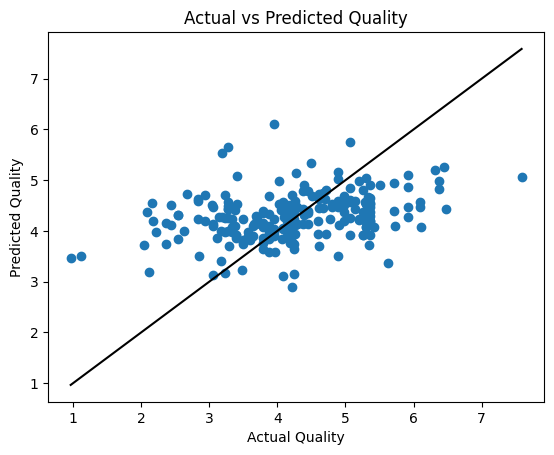

In [ ]:
pred = model_lr.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, pred)))


plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Problem #1.3**

Now let's build and fit a Neural Network to do the same task. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* No hidden layers.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 0s 2ms/step - loss: 15.2547 - mse: 15.2547
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 6.2823 - mse: 6.2823
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 2.3841 - mse: 2.3841
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1476 - mse: 1.1476
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9350 - mse: 0.9350
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9472 - mse: 0.9472
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9381 - mse: 0.9381
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9345 - mse: 0.9345
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9408 - mse: 0.9408
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9373 - mse: 0.9373


#### **2. Print the learned coefficients and intercept.**

**Run the two cells below to print the learned parameters for both the NN and the Linear Regression model from above.**

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-0.37312433]
 [-0.26593405]
 [-0.12449248]
 [-0.06086325]
 [-0.11588813]
 [ 0.03787168]
 [-0.06445273]
 [ 0.12425267]
 [-0.30604887]
 [ 0.18447575]
 [ 0.29241362]]

Biases: 
[4.306695]


In [ ]:
print('Coefficients: \n' + str(model_lr.coef_))
print('\nIntercept: \n' + str(model_lr.intercept_))

Coefficients: 
[-0.36560239 -0.28935364 -0.16150274 -0.06507778 -0.10119939  0.03015325
 -0.07055983  0.09489939 -0.28076838  0.13856176  0.2582551 ]

Intercept: 
4.304909390909908


#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 3ms/step - loss: 0.9409 - mse: 0.9409
MSE: [0.9409396648406982, 0.9409396648406982]
8/8 [==============================] - 0s 2ms/step


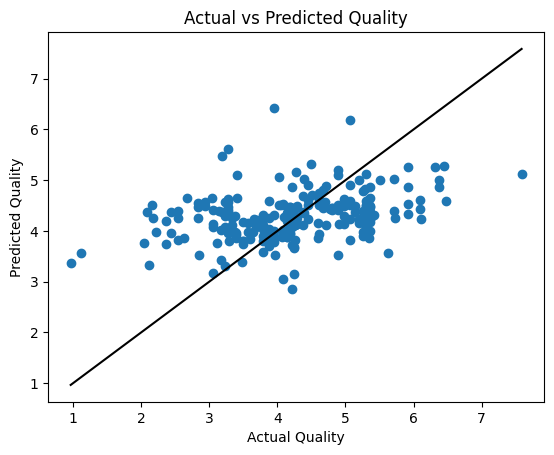

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Reflection Questions**

1. How did the performances of Linear Regression and the Neural Network compare?

2. How did the coefficients of Linear Regression and the Neural Network compare? Why might they be this way?

<a name="p2"></a>

---
## **Part 2: Model Architecture**
---

In this section, we will see how creating more complex model architectures (number of layers, neurons, and types of activation functions) can affect the performance of a Neural Network.

### **Problem #2.1**

Let's build and fit a *deeper* Neural Network to do the same task as above. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* One hidden layer with 8 neurons all with the `'linear'` activation function.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='linear'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 0s 2ms/step - loss: 8.5752 - mse: 8.5752
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.8518 - mse: 1.8518
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1584 - mse: 1.1584
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0421 - mse: 1.0421
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9723 - mse: 0.9723
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1633 - mse: 1.1633
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1142 - mse: 1.1142
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0367 - mse: 1.0367
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0070 - mse: 1.0070
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9986 - mse: 0.9986


#### **2. Print the learned coefficients and intercept.**

In [ ]:
layers = model_nn.layers
for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-5.8901012e-02 -8.6080566e-02  3.5421994e-01  1.2531072e-01
  -3.4385177e-01  3.0915231e-01 -6.9251977e-02 -4.9944010e-01]
 [ 1.9018804e-01 -2.4936706e-01 -2.7090302e-01  7.6857939e-02
  -6.9301623e-01  2.6569325e-01 -5.5212464e-02 -3.9261103e-01]
 [-1.6510323e-01 -1.8196680e-01 -1.1951938e-01  1.8286616e-02
  -5.0375670e-01 -5.1744126e-02 -1.3652296e-01 -4.7362077e-01]
 [-4.7384652e-01  6.4381167e-02 -2.1936902e-01  1.4781003e-01
  -4.6668133e-01 -2.0390050e-01  4.8733336e-01  1.7356724e-01]
 [ 3.3336431e-02  6.2697399e-01 -4.6227479e-01 -7.7892207e-02
  -7.7025533e-01  5.4113332e-02  2.9692242e-01 -2.6502591e-01]
 [ 3.1319776e-01 -2.6950535e-01 -1.2563583e-01 -3.1361833e-01
  -1.4603588e-01 -2.8362514e-02  1.6859169e-01  2.2462550e-01]
 [ 3.6105651e-01 -4.1373409e-02 -1.5940104e-01 -2.5511119e-01
   1.0809740e-01 -4.6154216e-02  2.0319080e-01 -1.1250131e-01]
 [-9.6499063e-02 -1.3614555e-01 -4.0466432e-05  5.3316027e-02
   4.3952000e-01  1.6481376e-01 -2.0080103e-

#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 3ms/step - loss: 1.0203 - mse: 1.0203
MSE: [1.020304799079895, 1.020304799079895]
8/8 [==============================] - 0s 3ms/step


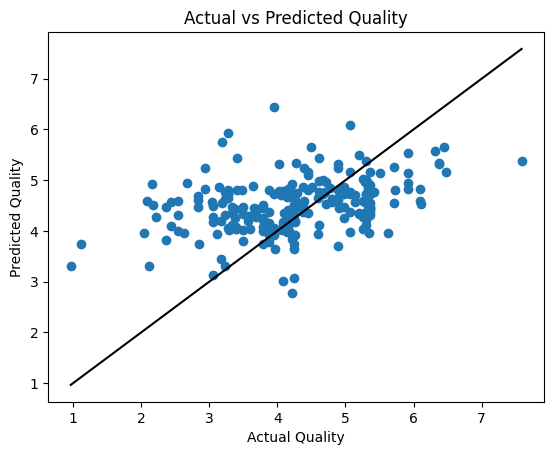

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test,y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test,pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Problem #2.2**

Let's build and fit a *deeper* Neural Network with *non-linear activation functions* to do the same task as above. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* One hidden layer with 8 neurons all with the `'relu'` activation function.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 0s 2ms/step - loss: 7.9607 - mse: 7.9607
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 2.2164 - mse: 2.2164
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.4545 - mse: 1.4545
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1727 - mse: 1.1727
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9307 - mse: 0.9307
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9470 - mse: 0.9470
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.8705 - mse: 0.8705
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8369 - mse: 0.8369
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7900 - mse: 0.7900
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7523 - mse: 0.7523


#### **2. Print the learned coefficients and intercept.**

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[ 0.1151393  -1.5738387  -1.408334   -0.26795954  0.23697864  0.72275764
   0.16262726 -0.6850709 ]
 [-0.253128   -0.54694915 -0.06727087  0.3276547   0.84170574 -0.6174857
  -0.64817864  0.06137924]
 [-0.26117706  0.5809442  -0.53782487 -1.1710298  -0.15884143  0.30192673
   0.15964575 -0.6380281 ]
 [-0.54444057  0.07043363 -0.05146923 -0.20459542  0.45013744 -0.2364309
   0.16938633  0.2990318 ]
 [-0.04252518 -0.11551781 -0.31891847 -0.41670308  0.00468003 -0.3274555
  -0.344424    0.42113155]
 [-0.19595972 -0.40138292 -0.19285975  0.33992282 -0.3327073   0.50722855
   0.4026054  -0.69633776]
 [ 0.1797065   0.9219296   0.00444128 -0.71739626 -0.52081954 -0.9995236
  -1.1230719   0.56917226]
 [ 0.27202636 -0.21809928 -0.66216654  0.04309723  0.32282254 -0.00802157
  -0.7915837   0.13248804]
 [ 0.18341562 -0.8128521   1.0531352   0.10435047 -0.06282854  0.35763556
  -0.20198916  0.39365643]
 [-0.41049635  0.12362093 -0.78125083 -0.16316608 -0.50048333  0.4601398
  -

#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 3ms/step - loss: 0.6761 - mse: 0.6761
MSE: [0.6761266589164734, 0.6761266589164734]
8/8 [==============================] - 0s 3ms/step


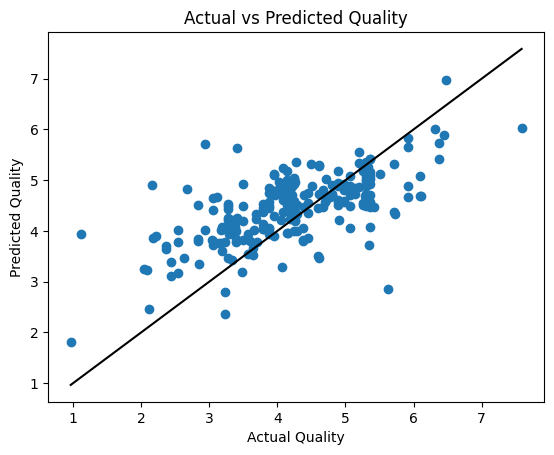

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Problem #2.3**

Let's build and fit a different *deeper* Neural Network with *non-linear activation functions* to do the same task as above. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* One hidden layer with 8 neurons all with the `'tanh'` activation function.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='tanh'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 1s 3ms/step - loss: 7.9924 - mse: 7.9924
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.3808 - mse: 1.3808
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7820 - mse: 0.7820
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7185 - mse: 0.7185
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6618 - mse: 0.6618
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6374 - mse: 0.6374
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6168 - mse: 0.6168
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6224 - mse: 0.6224
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6192 - mse: 0.6192
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5931 - mse: 0.5931


#### **2. Print the learned coefficients and intercept.**

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-0.46978545  1.2116446  -0.40436023 -0.12902284  0.24411783  2.334558
  -1.3674048   1.1557709 ]
 [-0.45638314 -0.29990256  0.3984968   0.23529446 -0.11742307  0.27915433
   0.50976616  0.10702752]
 [ 0.07679161  0.18247932  0.00831444  0.07681155  0.32001895  0.2071306
  -0.927063   -0.28157774]
 [-0.75195336 -0.07488772 -0.3234358   0.39508858  0.9924341  -0.12701474
   0.50190514 -0.47816253]
 [-0.34074646  0.21775286 -0.4011702  -0.04505546 -2.3860137  -0.48530424
  -0.9778353   0.53220755]
 [-0.40216333 -0.08003094  0.03206731  0.8204001   0.4750531  -0.05718587
  -0.01623625  0.4694895 ]
 [ 0.24444409  0.23236422 -0.69428164 -0.21035372 -0.38929912 -0.07502474
  -0.05335172 -0.62218   ]
 [ 0.7526386   0.039459    0.52613926  0.17469248  0.5077464   0.87140155
  -0.9055663   0.6177975 ]
 [-0.6382447  -0.16045855  0.42569986  0.02259828  0.47193938 -0.07012013
   0.49882665 -0.6466622 ]
 [-1.5974811  -0.06212717 -1.4540062   0.20360492 -0.48029634 -0.2315896
  

#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 2ms/step - loss: 0.5914 - mse: 0.5914
MSE: [0.5914046168327332, 0.5914046168327332]
8/8 [==============================] - 0s 2ms/step


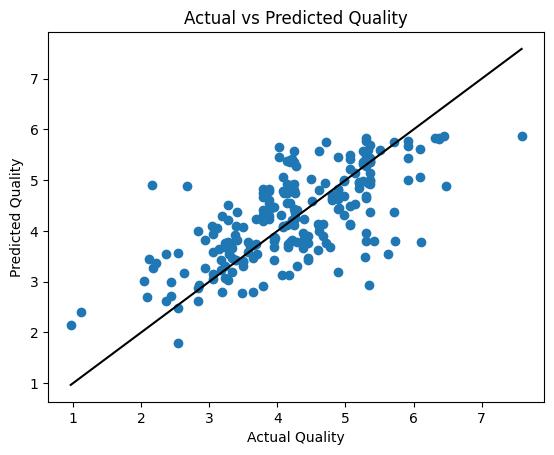

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Problem #2.4**

Let's build and fit a different *even deeper* Neural Network with *non-linear activation functions* to do the same task as above. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* One hidden layer with 8 neurons all with the `'tanh'` activation function.
* Another hidden layer with 4 neurons all with the `'relu'` activation function.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='tanh'))
model_nn.add(Dense(4,activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 4.5148 - mse: 4.5148
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.2688 - mse: 1.2688
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9468 - mse: 0.9468
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.8386 - mse: 0.8386
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7371 - mse: 0.7371
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7017 - mse: 0.7017
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7226 - mse: 0.7226
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7363 - mse: 0.7363
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7766 - mse: 0.7766
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6870 - mse: 0.6870


#### **2. Print the learned coefficients and intercept.**

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-1.6634057   0.17726582 -1.8325062  -1.5956072  -2.5122962  -0.01980255
   0.49819198  0.9783766 ]
 [ 0.49368197 -1.7597294  -0.86993515  0.2707108   0.12382884  0.05732737
  -0.75954324  0.6342901 ]
 [-0.7034787   0.6242624  -0.27880672  0.48833644 -0.30722016  0.41646323
   1.2084397   0.8374541 ]
 [ 0.15534265  1.1422176   0.44626927  0.89654917  0.262499   -0.08152831
  -0.39258727  1.7848386 ]
 [-0.86819136  0.3847296  -0.8475919  -0.3831604  -0.14391047 -0.15882291
   0.7064438   0.6775183 ]
 [ 1.540566    1.3831923  -0.2586231  -0.48771787 -0.18055552  1.0483475
   0.6172698   0.86305016]
 [ 1.3268417   0.9454277   0.3687235   0.87374055  0.0798066   2.2252913
  -0.2468773   0.7002744 ]
 [-1.2026936   0.17854884 -0.5323775  -0.18471919 -0.72502106 -0.157795
   0.4550155   2.641714  ]
 [ 1.2678825  -0.2904102   0.251459    0.8786044   0.41883117  0.7655044
   0.09651321  0.3729495 ]
 [ 0.91450995  0.04683054  0.3014563  -0.7363752  -0.02964582 -0.17183346
   

#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 8ms/step - loss: 0.6586 - mse: 0.6586
MSE: [0.658610999584198, 0.658610999584198]
8/8 [==============================] - 0s 3ms/step


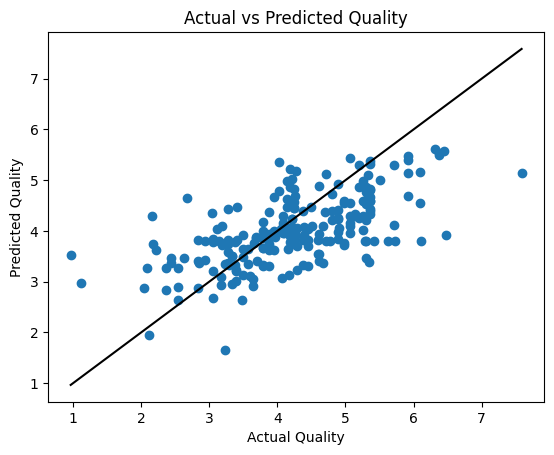

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

### **Problem #2.5**

Let's build and fit a different *even deeper* Neural Network with *non-linear activation functions* to do the same task as above. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* One hidden layer with 8 neurons all with the `'tanh'` activation function.
* Another hidden layer with 4 neurons all with the `'relu'` activation function.
* Another hidden layer with 4 neurons all with the `'sigmoid'` activation function.
* One output neuron with the `'linear'` activation function.


<br>

**NOTE**: The code to fit the model is provided below. We will unpack and modify this throughout today's lab.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='tanh'))
model_nn.add(Dense(4, activation='relu'))
model_nn.add(Dense(4, activation='sigmoid'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 2s 4ms/step - loss: 3.7471 - mse: 3.7471
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.2146 - mse: 1.2146
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0081 - mse: 1.0081
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.9539 - mse: 0.9539
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.9429 - mse: 0.9429
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.9148 - mse: 0.9148
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.8887 - mse: 0.8887
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.8647 - mse: 0.8647
Epoch 9/10
15/15 [==============================] - 0s 4ms/step - loss: 0.8515 - mse: 0.8515
Epoch 10/10
15/15 [==============================] - 0s 8ms/step - loss: 0.8243 - mse: 0.8243


#### **2. Print the learned coefficients and intercept.**

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[ 3.1304924   1.9010712  -1.6463813   2.7184196  -0.8661664  -2.12654
  -2.0709949   0.6778162 ]
 [ 0.3479598   0.4399862   1.397017    0.03597714  0.07704558 -1.6499076
  -0.00952063 -2.7034032 ]
 [ 1.2820319  -0.5149969  -0.38424203  1.2154914  -0.38076913 -0.78142273
  -1.5233024   0.4393916 ]
 [-1.1274112   0.5140576   0.63698006  0.5545532   0.31789398 -1.0466627
   0.06355835  0.8127693 ]
 [ 0.40001807  2.2635765  -0.5561212   1.5952961  -1.2692128  -0.25901046
  -1.4635872  -0.83719003]
 [ 0.5463931   0.43030015 -0.69054776 -0.10164859 -0.40973958  0.5684649
   0.00544368  1.375059  ]
 [-0.12311645 -0.11766512  1.1091745  -0.36203042 -1.6850145  -0.54904467
  -1.1935127   0.72013795]
 [ 0.92439806  1.915585    1.241437    0.42858747 -0.4356135  -2.5044403
  -0.6905743   0.3874994 ]
 [ 0.41369775  0.39612487  1.6246504  -0.83582914 -0.3031973   0.62173
   2.1420302  -0.9114103 ]
 [-0.48724073  0.7745937  -1.0803688   0.22683878 -0.35318416  1.3024858
   1.0025

#### **3. Evaluate it using the mean squared error and visualize the actual vs. predicted outputs in the test set.**

8/8 [==============================] - 0s 5ms/step - loss: 0.8378 - mse: 0.8378
MSE: [0.837813675403595, 0.837813675403595]
8/8 [==============================] - 0s 5ms/step


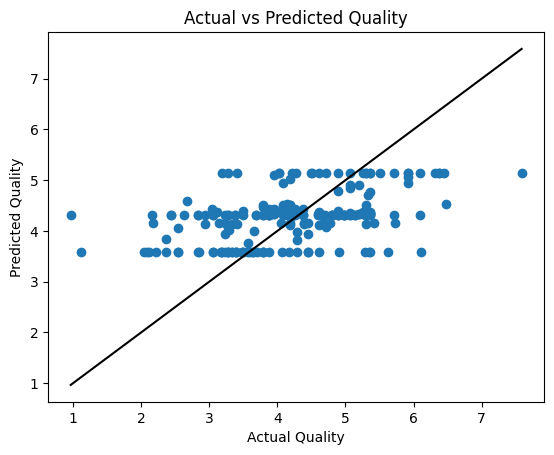

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))

pred = model_nn.predict(X_test)

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")

plt.show()

<a name="p3"></a>

---
## **Part 3: Hyperparameter Tuning**
---

In this section, we will see how tuning hyperparameters can affect the performance of a Neural Network.

### **Problem #3.1**

Modify the code below to find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = .1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
15/15 [==============================] - 0s 3ms/step - loss: 6.6178 - mse: 6.6178
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 1.9546 - mse: 1.9546
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.3521 - mse: 1.3521
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.0151 - mse: 1.0151
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9588 - mse: 0.9588
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8711 - mse: 0.8711
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.8217 - mse: 0.8217
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7683 - mse: 0.7683
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.7718 - mse: 0.7718
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.7186 - mse: 0.7186


### **Problem #3.2**

To reach the full potential of smaller learning rates, we often need to compensate by running more epochs. So, modify the code below to increase the `epochs` parameter to `100` and find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 5.8018 - mse: 5.8018
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.8089 - mse: 1.8089
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.1910 - mse: 1.1910
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9831 - mse: 0.9831
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9137 - mse: 0.9137
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8675 - mse: 0.8675
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8869 - mse: 0.8869
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8565 - mse: 0.8565
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8115 - mse: 0.8115
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8293 - mse: 0.8293
Epoch 11/100
15/15 [==============================] - 0s 4m

### **Problem #3.3**

The last main hyperparameter for us to consider is `batch_size`, which is how many data points we use to make a single update to the weights and parameters. Modify the code below to find the ideal `batch_size` given everything else is fixed. Consider values such as: `1`, `32`, `64`, `256`, and `len(X_train)`.

<br>

**NOTE**: Each epoch involves looking at *all* of the data points. In other words, **size of training data = batch_size * number of updates per epoch**. So, increasing `batch_size`, decreases the number of updates, which in turn speeds up each epoch. As such, pay attention to the amount of time it takes to run through each epoch.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 2s 3ms/step - loss: 13.7027 - mse: 13.7027
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 8.1591 - mse: 8.1591
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 5.0520 - mse: 5.0520
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 3.1376 - mse: 3.1376
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 2.3442 - mse: 2.3442
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.9102 - mse: 1.9102
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 1.6524 - mse: 1.6524
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4618 - mse: 1.4618
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3188 - mse: 1.3188
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 1.2069 - mse: 1.2069
Epoch 11/100
15/15 [==============================] - 0s 

### **Problem #3.4**

With so many hyperparameters to tune and potentially deep & complex NNs, the amount of information printed out often becomes less helpful to dig through. It is common practice to visualize the performance of different models for each epoch instead. Furthermore, we can "mute" the output of the `fit(...)` function by setting `verbose = False`.

<br>

**Complete the code below to train and visualize the losses of a NN with the best set of hyperparameters you found above.**


Some questions to consider:
* Does the loss tend to increase or decrease?
* Should we have let the model train for more epochs?
* Could we have gotten away with fewer epochs?


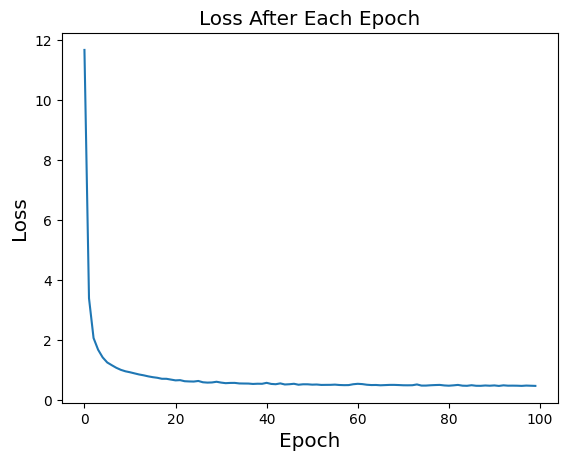

In [ ]:
# BUILD AND TRAIN
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = .01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = False, epochs=100, batch_size = 32)


# VISUALIZE
loss = history.history['loss']
plt.plot(loss)

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.show()

### **Problem #3.5**

We've forgotten one *very important* lesson from the course so far: **validation**! In practice, we should *never* tune hyperparameters or decide between models without both the training and validation metrics.

<br>

**Complete the code below to train and visualize the training *and* validation losses of a NN with the best set of hyperparameters you found above.**


Some questions to consider:
* Do the losses tend to increase or decrease?
* How do the training and validation losses compare?
* Should we have let the model train for more epochs?
* Could we have gotten away with fewer epochs?

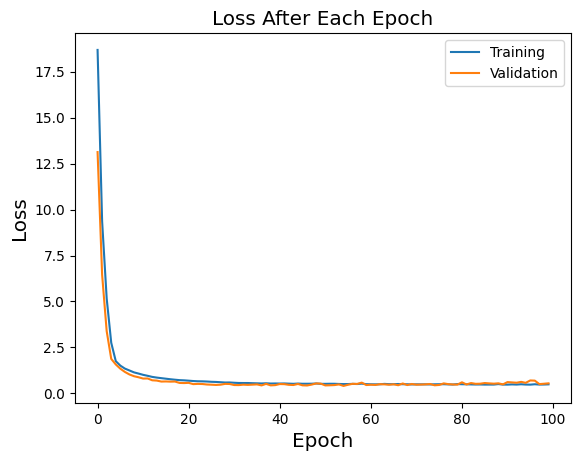

In [ ]:
# BUILD AND TRAIN
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = False, validation_split = 0.1, epochs=100, batch_size = 32)


# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

<a name="p4"></a>

---
## **Part 4: [HOMEWORK] Neural Networks for Classification**
---

In this section, we will see how to perform classification tasks using Neural Networks. As usual, we will return to the Iris dataset to get started! As a reminder, this dataset contains 150 data points with the following variables:

* `sepal length (cm)`.
* `sepal width (cm)`.
* `petal length (cm)`.
* `petal width (cm)`.
* `class`: 0 for setosa, 1 for versicolor, and 2 for virginica.

### **Problem #4.1**

To get started, let's:
1. Load the data into a data frame.
2. Split the data in training and test sets.
3. Standardize the features.

#### **1. Load the data into a data frame.**

In [ ]:
from sklearn import datasets

data = datasets.load_iris()

iris_df = pd.DataFrame(data.data, columns = data.feature_names)
iris_df['class'] = data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **2. Split the data in training and test sets.**

In [ ]:
features = iris_df.drop('class',axis=1)
label = iris_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **3. Standardize the features.**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Problem #4.2**

Before building the Neural Network, let's use a simpler Logistic Regression model for comparison. Specifcally, let's:
1. Create a Logistic Regression model, evaluate it using 10-Folds CV, and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Visualize the validation performance per fold.

#### **1. Create a Logistic Regression model, evaluate it using 10-Folds CV, and fit it to the training data.**

In [ ]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
scores = cross_val_score(model_log, X_train, y_train, cv=10)

print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

10-Folds CV Scores: 0.9333333333333332 +/- 0.10408329997330665


#### **2. Print the learned coefficients and intercept.**

In [ ]:
print('Coefficients: \n' + str(model_log.coef_))
print('\nIntercept: \n' + str(model_log.intercept_))

Coefficients: 
[[-1.00316768  1.14456076 -1.81255767 -1.69176083]
 [ 0.52785456 -0.28289055 -0.34085076 -0.71984718]
 [ 0.47531311 -0.8616702   2.15340842  2.41160801]]

Intercept: 
[-0.13379691  1.98339163 -1.84959472]


#### **3. Visualize the validation performance per fold.**

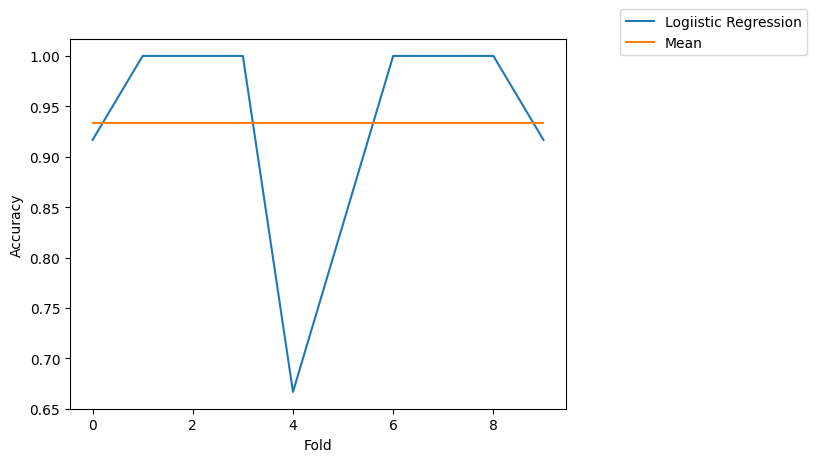

In [ ]:
plt.plot(scores,label='Logiistic Regression')
plt.plot([scores.mean()for i in range(10)], label='Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor = (1.5,1.1))

plt.show()

### **Problem #4.3**

Now let's build and fit a Neural Network to do the same task. Specifically, let's:
0. One hot encode the label.
1. Create a Neural Network and fit it to the training data.
2. Print the learned coefficients and intercept.
3. Visualize the training and validation performance per epoch.

#### **0. One hot encode the label.**

It is typical practice to one hot encode categorical variables in Deep Learning due to the nature of the loss functions used and the fact that Deep Learning tends to be unaffected by the curse of dimensionality so more features do not tend to be a problem.

<br>

**Run the code below to one hot encode the labels using the keras function `to_categorical(...)`.**

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* No hidden layers.
* Three output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. It outputs probabilities just like Logistic Regression. **NOTE: You need one output neuron per class.**

<br>

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.


In [ ]:
model_nn = Sequential()
model_nn.add(Input(4))
model_nn.add(Dense(3,activation='softmax'))# COMPLETE THIS LINE

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss ='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train_ohe, validation_split = 0.1, epochs=100, batch_size = 16)

Epoch 1/100
7/7 [==============================] - 2s 161ms/step - loss: 0.8227 - accuracy: 0.5741 - val_loss: 0.4548 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 0s 58ms/step - loss: 0.3635 - accuracy: 0.8333 - val_loss: 0.3731 - val_accuracy: 0.9167
Epoch 3/100
7/7 [==============================] - 1s 80ms/step - loss: 0.2952 - accuracy: 0.8704 - val_loss: 0.3537 - val_accuracy: 0.9167
Epoch 4/100
7/7 [==============================] - 0s 76ms/step - loss: 0.2533 - accuracy: 0.8981 - val_loss: 0.3022 - val_accuracy: 0.9167
Epoch 5/100
7/7 [==============================] - 1s 84ms/step - loss: 0.2162 - accuracy: 0.9352 - val_loss: 0.2535 - val_accuracy: 0.9167
Epoch 6/100
7/7 [==============================] - 0s 61ms/step - loss: 0.1870 - accuracy: 0.9444 - val_loss: 0.2255 - val_accuracy: 0.9167
Epoch 7/100
7/7 [==============================] - 0s 41ms/step - loss: 0.1679 - accuracy: 0.9537 - val_loss: 0.2061 - val_accuracy: 1.0000
Epoch 8/100
7/7 [==

#### **2. Print the learned weights and biases.**

**NOTE**: We have provided the code to compare to the logistic regression coefficients and intercepts, since the multinomial case can be a bit more complicated. If you're curious, the outputs from keras represent the weights for each feature in its own row (so there are 4 rows here). On the other hand, the outputs from sklearn represent the weights for each label/category in its own row (so there 3 rows). We have used the `.transpose()` function to ensure they are more clearly comparable.

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  print('Weights: \n' + str(layers[i].get_weights()[0]))
  print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-2.982535   1.5471897  1.1611079]
 [ 2.035656  -0.959557  -2.9837496]
 [-3.5953345 -1.3862749  6.2858586]
 [-5.013146  -1.6332592  5.628929 ]]

Biases: 
[-0.31253263  5.387237   -5.3077874 ]


In [ ]:
print('Coefficients: \n' + str(model_log.coef_.transpose()))
print('\nIntercept: \n' + str(model_log.intercept_))

Coefficients: 
[[-1.00316768  0.52785456  0.47531311]
 [ 1.14456076 -0.28289055 -0.8616702 ]
 [-1.81255767 -0.34085076  2.15340842]
 [-1.69176083 -0.71984718  2.41160801]]

Intercept: 
[-0.13379691  1.98339163 -1.84959472]


#### **3. Visualize the training and validation performance per epoch.**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code. Also include the mean CV accuracy score for the logistic regression model.

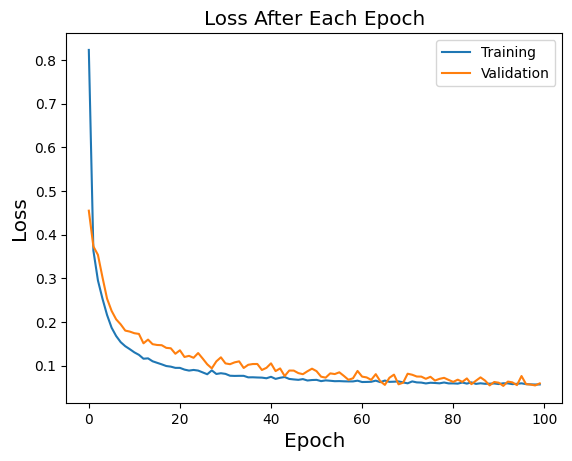

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

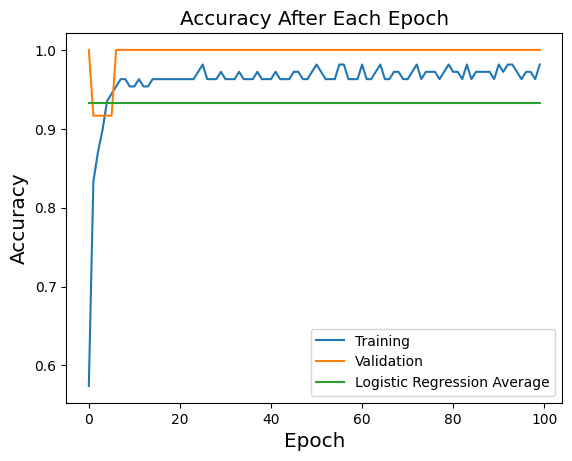

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.plot([scores.mean() for i in range(len(train_accuracy))], label = 'Logistic Regression Average')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #4.4**

Let's examine what the output of our models are to understand them more deeply. Specifically for the first test data point (as an example),

1. Print the probability of belonging to each class predicted by your logistic regression model.

2. Print the class predicted by your logistic regression model.

3. Print the probability of belonging to each class predicted by your neural network.

4. Print the class predicted by your neural network.

In [ ]:
data = X_test[0:1]

In [ ]:
model_log.predict_proba(data)

array([[0.01144751, 0.87601427, 0.11253823]])

In [ ]:
model_log.predict(data)

array([1])

In [ ]:
model_nn.predict(data)

1/1 [==============================] - 0s 117ms/step


array([[3.1332333e-05, 9.9451917e-01, 5.4495232e-03]], dtype=float32)

In [ ]:
np.argmax(model_nn.predict(data), axis = 1)

1/1 [==============================] - 0s 59ms/step


array([1])

### **Reflection Questions**

1. How did the validation performances of Logistic Regression and the Neural Network compare?

2. How did the coefficients of Logistic Regression and the Neural Network compare? Why might they be this way?

1. I thought the Neural network performed a little better with an accuracy of .97.  the logistics model had a lower accuracy of 0.93
2. The coefficents in each case are pretty much the same because a simple logistic regression would be the same as a Nerual network with only an input and a softmax output.


### **Problem #4.5**

In the space below, build, train, and visualize the performance of different Neural Networks for this task to see how various model architectures and hyperparameter tuning affects the performance. Your overall goal here is two fold:
1. Experiment with the various architecture and hyperparameter options to gain a deeper understanding of them.
2. See if you can get a better model than the ones above.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(4))
model_nn.add(Dense(4,'linear')) #tried an extra Dense layer.  Does not seem to help.   tried  linear and relu, neither seemed to do anthing also tried another node.  less accurate
model_nn.add(Dense(3,activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss ='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train_ohe, validation_split = 0.1, epochs=100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 1.6812 - accuracy: 0.2500 - val_loss: 1.4728 - val_accuracy: 0.4167
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.4202 - accuracy: 0.2500 - val_loss: 1.3224 - val_accuracy: 0.4167
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2452 - accuracy: 0.2593 - val_loss: 1.2127 - val_accuracy: 0.4167
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1249 - accuracy: 0.2778 - val_loss: 1.1363 - val_accuracy: 0.4167
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0483 - accuracy: 0.3796 - val_loss: 1.0798 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9976 - accuracy: 0.5556 - val_loss: 1.0372 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9562 - accuracy: 0.6111 - val_loss: 1.0034 - val_accuracy: 0.5833
Epoch 8/100
4/4 [===

#End of notebook
---
© 2023 The Coding School, All rights reserved